In [76]:
import pandas as pd

In [77]:
data_frame = pd.read_csv('datasets/S&P500_EOD-Price.csv')
data_frame = data_frame.dropna(axis=1)

data_frame.head()

,Date,APA,MTCH,GEN,DXC,EG,BKR,AMD,HON,BALL,...,SNPS,SWKS,ZION,TTWO,VRTX,TRMB,ZBRA,LNT,BBWI,WBA
0,2000-01-03,14.772727,7.527071,7.109375,46.327873,21.8750,20.2500,15.500,54.044136,2.488281,...,32.781250,31.406250,55.5000,9.125000,18.78125,4.145833,25.027779,13.40625,16.395514,28.5625
1,2000-01-04,14.123377,6.921444,6.781250,46.017365,21.8125,20.2500,14.625,53.090767,2.406250,...,30.437500,29.562500,52.8125,8.875000,17.28125,4.072917,24.666668,13.40625,16.067099,27.5000
2,2000-01-05,14.529221,6.661890,6.375000,42.788074,23.2500,20.3750,15.000,52.375736,2.449219,...,30.703125,30.328125,52.7500,8.833333,17.00000,3.817708,25.138889,14.06250,15.839733,27.8125
3,2000-01-06,15.909091,6.938748,6.007813,43.409092,24.3125,22.3125,16.000,53.388695,2.488281,...,28.468750,27.375000,53.5000,8.750000,16.75000,3.854167,23.777779,14.06250,15.587106,27.0000
4,2000-01-07,15.854978,6.904141,6.484375,43.315941,25.6250,23.8125,16.250,56.248802,2.417969,...,28.750000,30.187500,53.6250,9.000000,18.21875,3.854167,23.513889,14.25000,15.688157,27.6875


In [90]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame['Year'] = data_frame["Date"].dt.year

processing_years = [year for year in range(2000, 2024)]
data_frame_annual_returns = pd.DataFrame()

for year in processing_years:
    filtered_data = data_frame[data_frame['Year'] == year]
    for column in filtered_data.columns:
        if column not in ["Date", "Year"]:
            first_value = filtered_data[column].iloc[0]
            last_value = filtered_data[column].iloc[-1]
            annual_return = (last_value - first_value) / first_value
            print(str(column) + " " + str(year) + " " + str(annual_return))

APA 2000 1.0531136871344067
MTCH 2000 -0.28505749447560685
GEN 2000 -0.41318681318681316
DXC 2000 -0.3552278991958037
EG 2000 2.2742857142857145
BKR 2000 1.0524691358024691
AMD 2000 -0.10887096774193548
HON 2000 -0.16538036615110294
BALL 2000 0.15698588704410796
REG 2000 0.18808777429467086
RVTY 2000 1.5339366515837105
GL 2000 0.35761582404280323
TER 2000 -0.39737108190091003
COO 2000 0.3516949152542373
TFC 2000 0.44552058111380144
HST 2000 0.5333332849066673
CSX 2000 -0.16161629090909096
CTRA 2000 1.1054849620253164
LHX 2000 0.18072289156626511
NWL 2000 -0.18018018018018017
VTRS 2000 0.03333332410256392
RTX 2000 0.2580000178984968
EXC 2000 1.072619915178898
J 2000 0.4461839530332681
PEAK 2000 0.24805742072409076
TT 2000 -0.2099057244363874
AEP 2000 0.47912524850894633
PEP 2000 0.3440677966101695
STE 2000 0.6024844720496895
HAL 2000 -0.053833605220228384
COR 2000 2.244979919678715
O 2000 0.198795121400496
CL 2000 0.03694785542168677
CI 2000 0.6866932366122448
IP 2000 -0.264639619151259

c:\users\cigan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


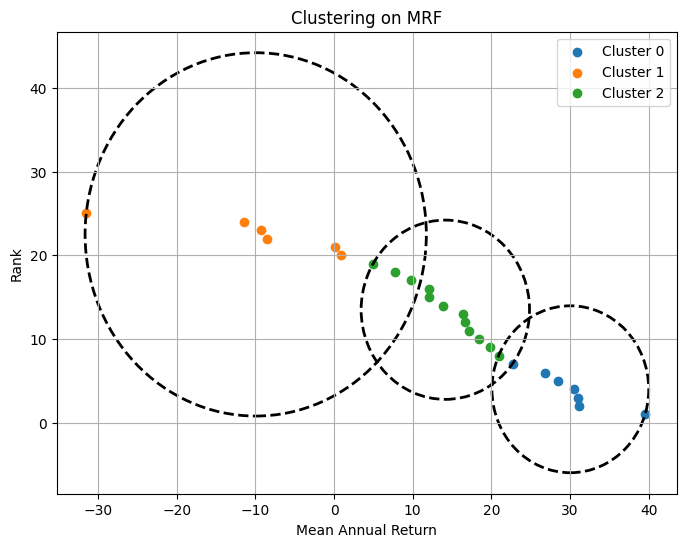

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

features = ranked_portfolios[['Mean Annual Return', 'Rank']].values
kmeans = KMeans(n_clusters=3) 
kmeans.fit(features)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
ranked_portfolios['Cluster'] = labels
plt.figure(figsize=(8, 6))

for cluster_label in range(3):  
    cluster_data = ranked_portfolios[ranked_portfolios['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Mean Annual Return'], cluster_data['Rank'], label=f'Cluster {cluster_label}')

for i in range(len(centers)):
    cluster_data = ranked_portfolios[ranked_portfolios['Cluster'] == i][['Mean Annual Return', 'Rank']]
    radius = np.max(np.linalg.norm(cluster_data.values - centers[i], axis=1))
    circle = plt.Circle(centers[i], radius, color='black', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

plt.xlabel('Mean Annual Return')
plt.ylabel('Rank')
plt.title('Clustering on MRF')
plt.legend()
plt.grid(True)
plt.show()